In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import nltk


In [3]:
import re
from nltk.corpus  import wordnet
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [4]:
df = pd.read_csv("WELFake_Dataset.csv", encoding="latin1",usecols=["title","text","label"])
df_0=df[df["label"]==0].sample(5000)
df_1=df[df["label"]==1].sample(5000)


C:\Users\zas\AppData\Local\Temp\ipykernel_16288\1975891199.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("WELFake_Dataset.csv", encoding="latin1",usecols=["title","text","label"])


In [5]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

In [6]:
data=pd.concat([df_0,df_1])
data.head()

,title,text,label
74755,China's Xi tells India's Modi to safeguard pea...,BEIJING (Reuters) - China s President Xi Jinpi...,0
66819,Yazidis to Anti-Trumpers: Where Were You Durin...,Outrage over President Donald Trumpâs execut...,0
62700,Irish PM 'doing everything he can' to avoid el...,DUBLIN (Reuters) - Irish Prime Minister Leo Va...,0.0
63477,Trump considers retired General Petraeus as to...,WASHINGTON (Reuters) - Donald Trump will meet ...,0.0
48341,Catalonia independence drive second largest co...,MADRID (Reuters) - The independence drive in S...,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 74755 to 50195
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9928 non-null   object
 1   text    9996 non-null   object
 2   label   10000 non-null  object
dtypes: object(3)
memory usage: 312.5+ KB


In [8]:
data.isna().sum()

title    72
text      4
label     0
dtype: int64

In [9]:
len(data.columns)

3

In [10]:
data.dropna(inplace=True)
data.isna().sum()

title    0
text     0
label    0
dtype: int64

In [11]:
data.reset_index(inplace=True)
data.head()

,index,title,text,label
0,74755,China's Xi tells India's Modi to safeguard pea...,BEIJING (Reuters) - China s President Xi Jinpi...,0
1,66819,Yazidis to Anti-Trumpers: Where Were You Durin...,Outrage over President Donald Trumpâs execut...,0
2,62700,Irish PM 'doing everything he can' to avoid el...,DUBLIN (Reuters) - Irish Prime Minister Leo Va...,0.0
3,63477,Trump considers retired General Petraeus as to...,WASHINGTON (Reuters) - Donald Trump will meet ...,0.0
4,48341,Catalonia independence drive second largest co...,MADRID (Reuters) - The independence drive in S...,0


In [12]:
data.shape

(9924, 4)

In [13]:
X=data.drop("label",axis=1)
y=data.label

In [14]:
y.head()

0      0
1      0
2    0.0
3    0.0
4      0
Name: label, dtype: object

In [15]:
messages = X.copy()

In [16]:
messages.head()

,index,title,text
0,74755,China's Xi tells India's Modi to safeguard pea...,BEIJING (Reuters) - China s President Xi Jinpi...
1,66819,Yazidis to Anti-Trumpers: Where Were You Durin...,Outrage over President Donald Trumpâs execut...
2,62700,Irish PM 'doing everything he can' to avoid el...,DUBLIN (Reuters) - Irish Prime Minister Leo Va...
3,63477,Trump considers retired General Petraeus as to...,WASHINGTON (Reuters) - Donald Trump will meet ...
4,48341,Catalonia independence drive second largest co...,MADRID (Reuters) - The independence drive in S...


In [17]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
ps=PorterStemmer()
lm=WordNetLemmatizer()
corpus=[]
for  var in range(len(messages)):
   review=re.sub("[^a-zA-Z0_9]"," ",messages["title"][var])
   review=review.lower()
   review=review.split()
   review=[lm.lemmatize(x) for x in review if  x not in  stopwords.words("english")]
   review=" ".join(review)
   corpus.append(review)

In [18]:
corpus[0:5]

['china xi tell india modi safeguard peace border area medium',
 'yazidis anti trumpers genocide u',
 'irish pm everything avoid election spokesman',
 'trump considers retired general petraeus top diplomat bloomberg',
 'catalonia independence drive second largest concern unemployment poll']

In [19]:
print(sum(len(var.split())for var in corpus))

89973


In [20]:
print(max(len(var.split()) for var in corpus))

47


In [21]:
len(corpus)

9924

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=10000,ngram_range=(1,3))
x=tfidf.fit_transform(corpus).toarray()


In [23]:
y = data["label"]
y=y.astype(np.int32())
y.dtype


dtype('int32')

In [24]:
y.isna().sum()

0

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
# y_train.isna().sum()
# y_train.dtype

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

RandomForestClassifier
              precision    recall  f1-score   support

           0     0.8860    0.8370    0.8608      1012
           1     0.8397    0.8880    0.8631       973

    accuracy                         0.8620      1985
   macro avg     0.8628    0.8625    0.8620      1985
weighted avg     0.8633    0.8620    0.8619      1985



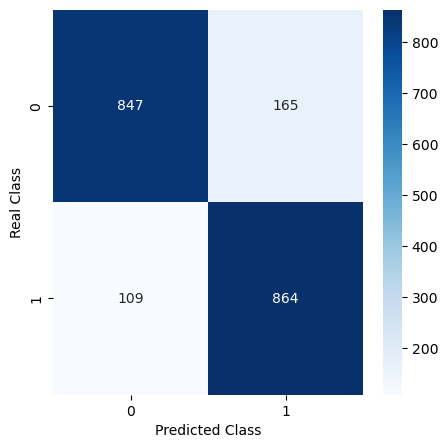

In [28]:
y_pred_rfc=rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
print("RandomForestClassifier")
print(classification_report(y_test,y_pred_rfc,digits=4))
cm=confusion_matrix(y_test,y_pred_rfc)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()



In [29]:
from sklearn.naive_bayes import MultinomialNB
mtnb=MultinomialNB()
mtnb.fit(X_train,y_train)


MultinomialNB()

MultinomialNB
              precision    recall  f1-score   support

           0     0.8860    0.8370    0.8608      1012
           1     0.8397    0.8880    0.8631       973

    accuracy                         0.8620      1985
   macro avg     0.8628    0.8625    0.8620      1985
weighted avg     0.8633    0.8620    0.8619      1985



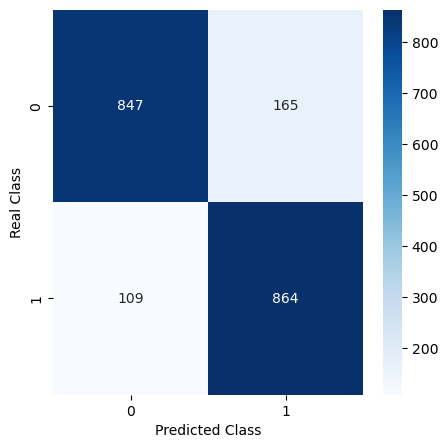

In [30]:
y_pred_mtnb=rfc.predict(X_test)

print("MultinomialNB")
print(classification_report(y_test,y_pred_mtnb,digits=4))
cm=confusion_matrix(y_test,y_pred_mtnb)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

logistic_regression=LogisticRegression()
svm=SVC()
sgdclassifier=SGDClassifier()
dtc=DecisionTreeClassifier()
xgboost=XGBClassifier()
gradient_boosting = GradientBoostingClassifier()
adaboost = AdaBoostClassifier()
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score

logistic_regression.fit(X_train, y_train)
svm.fit(X_train, y_train)
sgdclassifier.fit(X_train, y_train)
dtc.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

models=[logistic_regression,svm,sgdclassifier,dtc,xgboost,gradient_boosting,adaboost]
models_names=["Logistic Regression","SVC","SGD Classifier","Decision Tree Classifier","XG Boosting Classifier",
              "Gradient Boosting Classifier","Ada Boost Classifier"]
for name,model  in zip(models_names,models):
  print(f"----------{name}-------")
  print(f" accuracy_score  {accuracy_score(y_test,model.predict(X_test))}")
  print(f" precision_score  {precision_score(y_test,model.predict(X_test))}")
  print(f" recall_score  {recall_score(y_test,model.predict(X_test))}")
  print(f" f1_score  {f1_score(y_test,model.predict(X_test))}")
  print("\n")






----------Logistic Regression-------
 accuracy_score  0.87455919395466
 precision_score  0.8584158415841584
 recall_score  0.8910585817060637
 f1_score  0.8744326777609681


----------SVC-------
 accuracy_score  0.8841309823677582
 precision_score  0.8703888334995015
 recall_score  0.8972250770811921
 f1_score  0.8836032388663967


----------SGD Classifier-------
 accuracy_score  0.8720403022670025
 precision_score  0.8500486854917235
 recall_score  0.8972250770811921
 f1_score  0.873


----------Decision Tree Classifier-------
 accuracy_score  0.8085642317380353
 precision_score  0.8117770767613038
 recall_score  0.7934224049331963
 f1_score  0.8024948024948025


----------XG Boosting Classifier-------
 accuracy_score  0.8468513853904283
 precision_score  0.8071625344352618
 recall_score  0.9033915724563206
 f1_score  0.8525703200775946


----------Gradient Boosting Classifier-------
 accuracy_score  0.8050377833753148
 precision_score  0.7425496688741722
 recall_score  0.921891058581

In [32]:
ensemble=VotingClassifier(estimators=[
            ("svm",svm),("dtc",dtc),("logistic_regression",logistic_regression),
            ("sgdclassifier",sgdclassifier),("adaboost",adaboost),("xgboost",xgboost),("gradient_boosting",gradient_boosting)
],voting="hard")
ensemble.fit(X_train,y_train)


VotingClassifier(estimators=[('svm', SVC()), ('dtc', DecisionTreeClassifier()),
                             ('logistic_regression', LogisticRegression()),
                             ('sgdclassifier', SGDClassifier()),
                             ('adaboost', AdaBoostClassifier()),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stoppin...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                          

--- Ensemble (Voting Classifier) ---
Accuracy: 0.8680100755667506
Precision: 0.8350612629594723
Recall: 0.9105858170606372
F1 Score: 0.8711897738446411
              precision    recall  f1-score   support

           0     0.9058    0.8271    0.8647      1012
           1     0.8351    0.9106    0.8712       973

    accuracy                         0.8680      1985
   macro avg     0.8705    0.8688    0.8679      1985
weighted avg     0.8711    0.8680    0.8679      1985



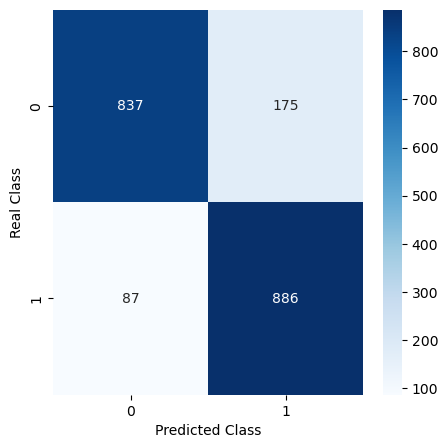

In [33]:
y_pred_ensemble = ensemble.predict(X_test)

print("--- Ensemble (Voting Classifier) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Precision:", precision_score(y_test, y_pred_ensemble))
print("Recall:", recall_score(y_test, y_pred_ensemble))
print("F1 Score:", f1_score(y_test, y_pred_ensemble))

print(classification_report(y_test,y_pred_ensemble,digits=4))
cm=confusion_matrix(y_test,y_pred_ensemble)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

In [34]:
from sklearn.ensemble import StackingClassifier

models_level_0=[
           ("dtc",dtc),("logistic_regression",logistic_regression),
            ("sgdclassifier",sgdclassifier),("adaboost",adaboost),("xgboost",xgboost),("gradient_boosting",gradient_boosting)
            ,("mtnb",mtnb)
]
final_level=SVC()
stacking_classifier=StackingClassifier(
            estimators=models_level_0,
            final_estimator=final_level,
            n_jobs=-1,
           
)
stacking_classifier.fit(X_train,y_train)


StackingClassifier(estimators=[('dtc', DecisionTreeClassifier()),
                               ('logistic_regression', LogisticRegression()),
                               ('sgdclassifier', SGDClassifier()),
                               ('adaboost', AdaBoostClassifier()),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=Non...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_st

--- Stacking Classifier ---
Accuracy: 0.8841309823677582
Precision: 0.8914646996838778
Recall: 0.869475847893114
F1 Score: 0.8803329864724245
              precision    recall  f1-score   support

           0     0.8774    0.8982    0.8877      1012
           1     0.8915    0.8695    0.8803       973

    accuracy                         0.8841      1985
   macro avg     0.8844    0.8838    0.8840      1985
weighted avg     0.8843    0.8841    0.8841      1985



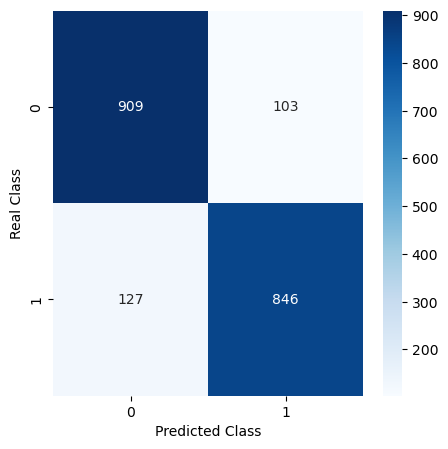

In [35]:
y_pred_stacking = stacking_classifier.predict(X_test)
print("--- Stacking Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Precision:", precision_score(y_test, y_pred_stacking))
print("Recall:", recall_score(y_test, y_pred_stacking))
print("F1 Score:", f1_score(y_test, y_pred_stacking))
print(classification_report(y_test,y_pred_stacking,digits=4))
cm=confusion_matrix(y_test,y_pred_stacking)
plt.figure(figsize=(5,5),dpi=100)
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")

plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()